In [ ]:
from google.colab import drive
import pandas as pd


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install fastai

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import pandas as pd
from fastai.collab import CollabDataLoaders, collab_learner
import matplotlib.pyplot as plt
from fastai.tabular.all import RandomSplitter
from fastai.collab import *
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import seaborn as sns


In [ ]:
music_info_data = pd.read_csv('/content/drive/My Drive/Spotify_Dataset/Music_Info.csv')
listening_history_data = pd.read_csv('/content/drive/My Drive/Spotify_Dataset/User_Listening_History.csv')

In [ ]:
music_info_data.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46866cd9106936ea55dfcbaa75?cid=774b29d4f13844c495f206cafdad9c86,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, indie_rock, 00s",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927bd6c8ced0dae75ee3b7715983?cid=774b29d4f13844c495f206cafdad9c86,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_rock, british, 90s, love, britpop",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031eb20e5951a8bfb30503224e9?cid=774b29d4f13844c495f206cafdad9c86,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be449c2aebff816ba8c62559871?cid=774b29d4f13844c495f206cafdad9c86,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, indie_rock, british, 00s, britpop",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a27299ea8803aadf4fa9cf795c?cid=774b29d4f13844c495f206cafdad9c86,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, indie_rock, british, 90s, britpop",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:
listening_history_data.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


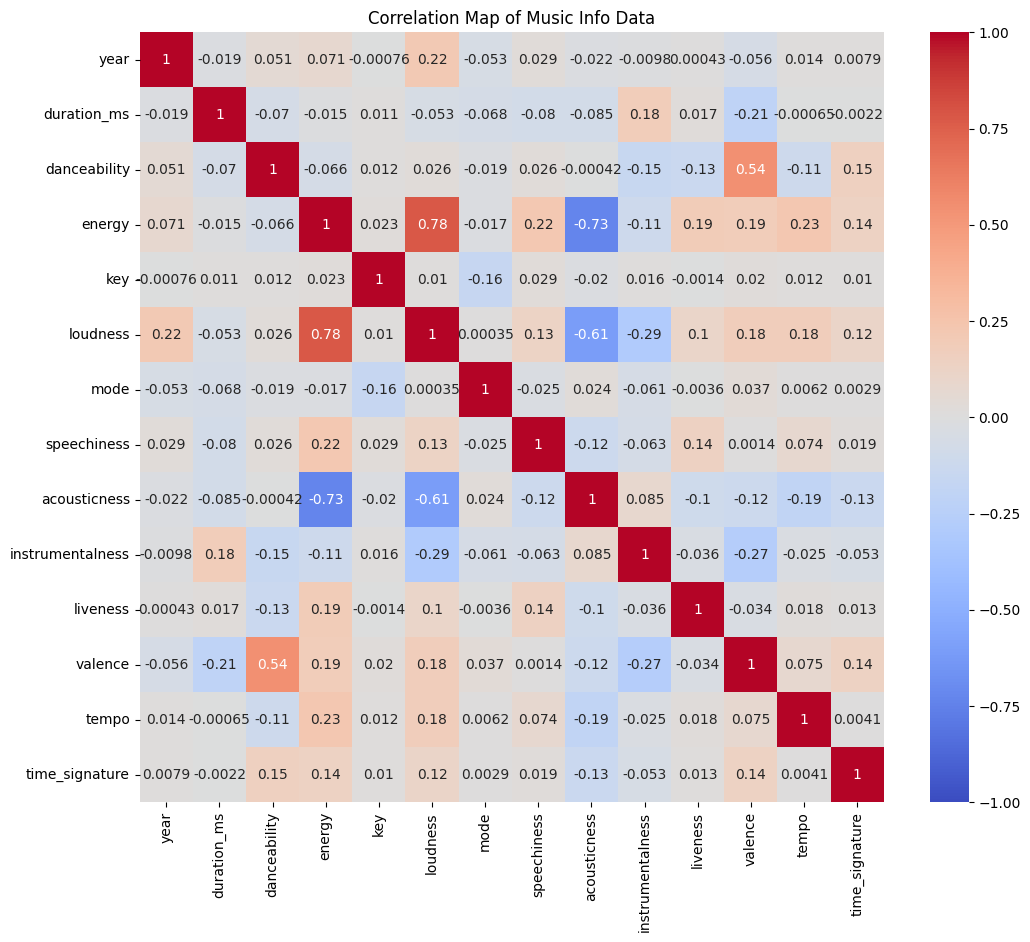

In [ ]:
numerical_cols = [
    'year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature'
]

# Compute the correlation matrix
corr_matrix = music_info_data[numerical_cols].corr()

# Plot the correlation map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map of Music Info Data')
plt.show()

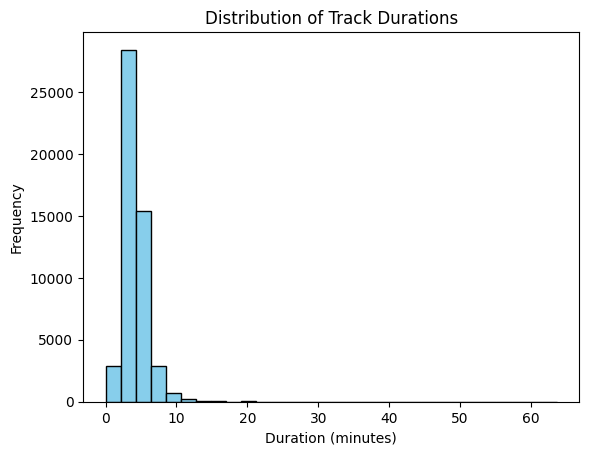

In [ ]:

plt.hist(music_info_data['duration_ms'] / 60000, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


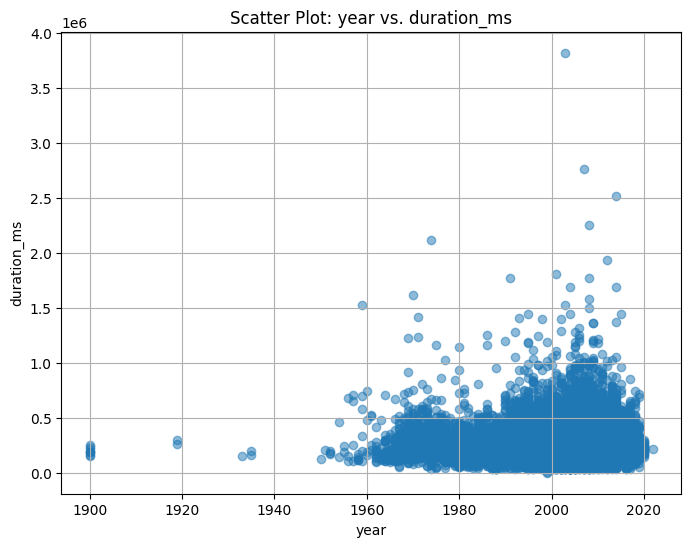

In [ ]:
# Selecting pairs of numerical features for scatter plots
numerical_features = [
    'year', 'duration_ms'
]

# Generate scatter plots for all combinations of numerical features
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        x_feature = numerical_features[i]
        y_feature = numerical_features[j]

        # Plotting the scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(music_info_data[x_feature], music_info_data[y_feature], alpha=0.5)
        plt.title(f'Scatter Plot: {x_feature} vs. {y_feature}')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.grid(True)
        plt.show()

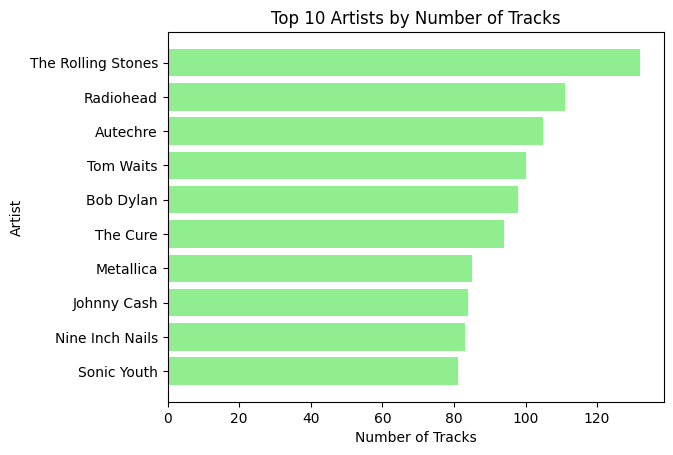

In [ ]:
top_artists = music_info_data['artist'].value_counts().head(10)

plt.barh(top_artists.index, top_artists.values, color='lightgreen')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Top 10 Artists by Number of Tracks')
plt.gca().invert_yaxis()
plt.show()

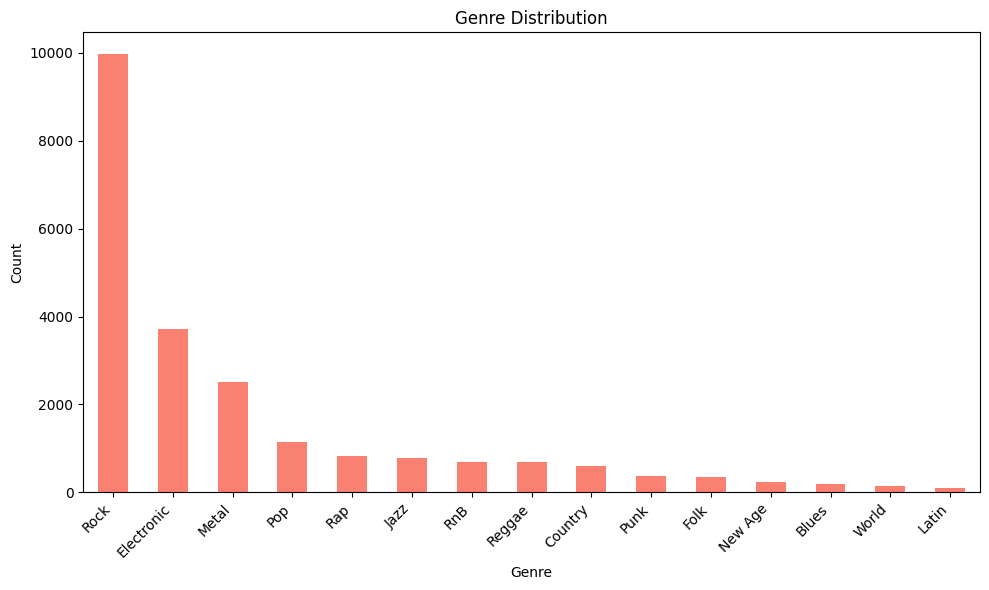

In [ ]:
genre_counts = music_info_data['genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='salmon')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


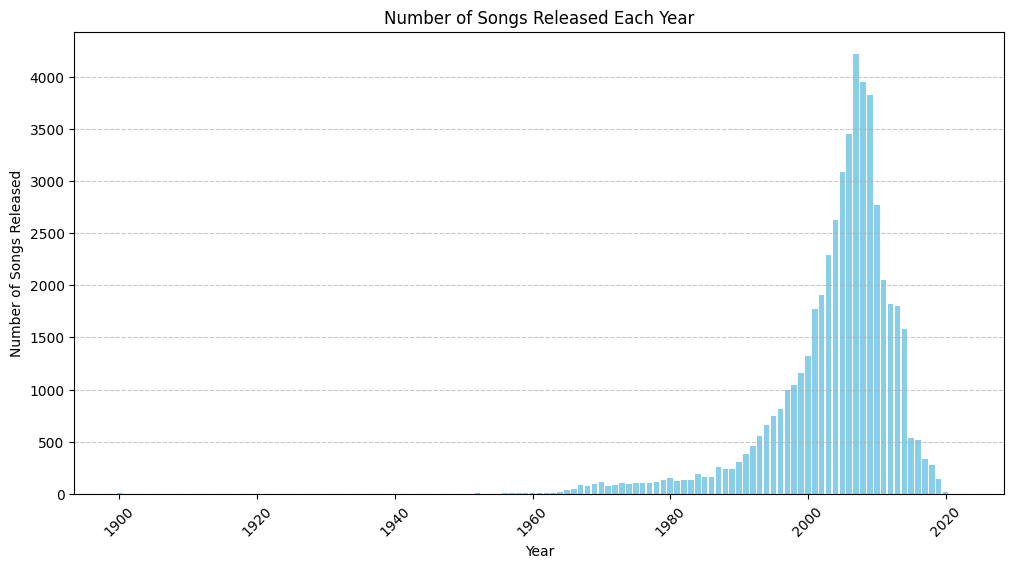

In [ ]:
# Count the number of songs released each year
songs_per_year = music_info_data['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(songs_per_year.index, songs_per_year.values, color='skyblue')
plt.title('Number of Songs Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Minimum duration
min_duration = music_info_data['duration_ms'].min()

# Maximum duration
max_duration = music_info_data['duration_ms'].max()

print("Minimum duration:", min_duration, "milliseconds")
print("Maximum duration:", max_duration, "milliseconds")


Minimum duration: 1439 milliseconds
Maximum duration: 3816373 milliseconds


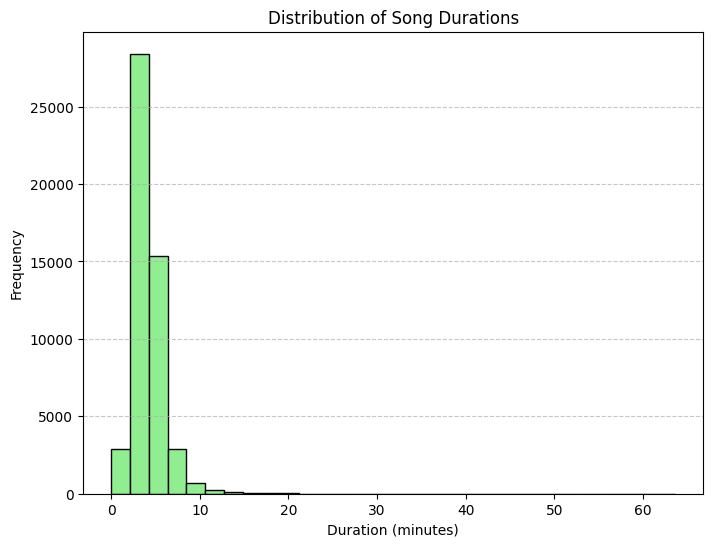

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(music_info_data['duration_ms'] / 60000, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
listening_history_merged = pd.merge(listening_history_data, music_info_data[['track_id', 'name','artist', 'genre', 'year', 'duration_ms',
                                                           'danceability', 'energy', 'loudness', 'speechiness',
                                                           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']],
                             on='track_id', how='left')

In [ ]:
# Add a new column "entry" to raw dataframe with track name, artist and year.
listening_history_merged["song"] = listening_history_merged["name"] + ", " + listening_history_merged["artist"] + ", " + listening_history_merged["year"].astype(str)


In [ ]:
listening_history_merged.head()

,track_id,user_id,playcount,name,artist,genre,year,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Nothing From Nothing,Billy Preston,RnB,2010,155453,0.759,0.834,-5.206,0.0276,0.58500,0.055000,0.3310,0.939,102.792,"Nothing From Nothing, Billy Preston, 2010"
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Paper Gangsta,Lady Gaga,Pop,2012,260000,0.823,0.530,-9.344,0.0579,0.80400,0.782000,0.1050,0.800,100.002,"Paper Gangsta, Lady Gaga, 2012"
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Soy,Gipsy Kings,NaN,2003,187106,0.797,0.592,-11.647,0.0673,0.69200,0.000002,0.1100,0.851,104.518,"Soy, Gipsy Kings, 2003"
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stacked Actors,Foo Fighters,Rock,1999,256440,0.502,0.934,-5.145,0.0500,0.00203,0.001020,0.2340,0.670,134.898,"Stacked Actors, Foo Fighters, 1999"
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Heaven's Gonna Burn Your Eyes,Thievery Corporation,Electronic,2002,250360,0.516,0.337,-9.812,0.0286,0.63500,0.521000,0.0637,0.323,152.411,"Heaven's Gonna Burn Your Eyes, Thievery Corporation, 2002"


In [ ]:
if 'playcount' in listening_history_merged.columns:
    min_playcount = listening_history_merged['playcount'].min()
    max_playcount = listening_history_merged['playcount'].max()
    print(f"Minimum playcount: {min_playcount}")
    print(f"Maximum playcount: {max_playcount}")
else:
    print("The dataset does not contain a 'playcount' column.")

Minimum playcount: 1
Maximum playcount: 2948


In [ ]:
listening_history_merged.rename(columns={'user_id': 'user', 'song': 'item', 'playcount': 'rating'}, inplace=True)


In [ ]:
listening_history_merged.head()

,track_id,user,rating,name,artist,genre,year,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,item
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Nothing From Nothing,Billy Preston,RnB,2010,155453,0.759,0.834,-5.206,0.0276,0.58500,0.055000,0.3310,0.939,102.792,"Nothing From Nothing, Billy Preston, 2010"
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Paper Gangsta,Lady Gaga,Pop,2012,260000,0.823,0.530,-9.344,0.0579,0.80400,0.782000,0.1050,0.800,100.002,"Paper Gangsta, Lady Gaga, 2012"
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Soy,Gipsy Kings,NaN,2003,187106,0.797,0.592,-11.647,0.0673,0.69200,0.000002,0.1100,0.851,104.518,"Soy, Gipsy Kings, 2003"
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Stacked Actors,Foo Fighters,Rock,1999,256440,0.502,0.934,-5.145,0.0500,0.00203,0.001020,0.2340,0.670,134.898,"Stacked Actors, Foo Fighters, 1999"
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,Heaven's Gonna Burn Your Eyes,Thievery Corporation,Electronic,2002,250360,0.516,0.337,-9.812,0.0286,0.63500,0.521000,0.0637,0.323,152.411,"Heaven's Gonna Burn Your Eyes, Thievery Corporation, 2002"


In [ ]:
len(listening_history_merged)

9711301

In [ ]:
listening_history_merged['playcount_normalized'] = 1

In [ ]:
def get_model_df(listening_history_merged, num_users=10000):
    # Get a unique list of all user_ids in the DataFrame
    all_users = listening_history_merged['user'].unique()
    print(all_users[:20])
    # Ensure num_users does not exceed the length of all_users
    num_users = min(num_users, len(all_users))
    print(num_users)
    # Get the first num_users from all_users
    first_users = all_users[:num_users]
    print(first_users)
    # Filter the DataFrame to include only selected users
    filtered_dataframe = listening_history_merged[listening_history_merged['user'].isin(first_users)]

    # Return the filtered DataFrame
    return filtered_dataframe

In [ ]:
listening_history_filtered = get_model_df(listening_history_merged, 10000)


['b80344d063b5ccb3212f76538f3d9e43d87dca9e'
 '85c1f87fea955d09b4bec2e36aee110927aedf9a'
 'bd4c6e843f00bd476847fb75c47b4fb430a06856'
 '969cc6fb74e076a68e36a04409cb9d3765757508'
 '4bd88bfb25263a75bbdd467e74018f4ae570e5df'
 'e006b1a48f466bf59feefed32bec6494495a4436'
 '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec'
 '9bb911319fbc04f01755814cb5edb21df3d1a336'
 'b64cdd1a0bd907e5e00b39e345194768e330d652'
 '17aa9f6dbdf753831da8f38c71b66b64373de613'
 'd6589314c0a9bcbca4fee0c93b14bc402363afea'
 '5a905f000fc1ff3df7ca807d57edb608863db05d'
 'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1'
 '45544491ccfcdc0b0803c34f201a6287ed4e30f8'
 'ed7d4c476013b1c3dd91982b61494bf7436083ba'
 'baf47ed8da24d607e50d8684cde78b923538640f'
 '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf'
 'bd8475385f0aa78830fa6dfce9e7242164b035c8'
 '0afaa5d9d04bf85af720fe8cc566a41ca3e41c97'
 '403b3b867fc71dfdcc12652f30e88bdc7ccd9aa4']
10000
['b80344d063b5ccb3212f76538f3d9e43d87dca9e'
 '85c1f87fea955d09b4bec2e36aee110927aedf9a'
 'bd4c6e843f00bd476847fb7

In [ ]:
len(listening_history_filtered)

103827

In [ ]:
listening_history_filtered['user'].unique()

array(['b80344d063b5ccb3212f76538f3d9e43d87dca9e',
       '85c1f87fea955d09b4bec2e36aee110927aedf9a',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856', ...,
       '3dcd9fb4c41cfe21c8d0999a516019bc9df15b75',
       '71ab0d8978284ce8b1549de9c79764baf7a1bc0a',
       'c475c3dde832bff99fe2ee3ef18cbb378b1b2eab'], dtype=object)

In [ ]:
# splits = RandomSplitter(valid_pct=0.1, seed=42)(range(len(listening_history_filtered)))
#

In [ ]:
model_fastai = CollabDataLoaders.from_df(listening_history_filtered, user_name='user', item_name='item', rating_name='playcount_normalized',
                                 cat_names=['artist', 'genre'], cont_names=['year', 'duration_ms', 'danceability',
                                                                                   'energy', 'loudness'])


In [ ]:
model_fastai.show_batch()

,user,item,playcount_normalized
0,35b51b0905092f6923e7af5792189d4119c9dc3a,"Drippy Eye, Black Moth Super Rainbow, 2007",1
1,a74e8b4f0c2a81da29594dfe276c28e26bf43f8c,"Lullabies, All Time Low, 2008",1
2,ac1c7a488e016d477fd6d23ef45a8a48643c02e7,"No More No More, Aerosmith, 1973",1
3,77514e806f7b973ed4aade5b54dd10de52b9edec,"Total Revenge, Say Anything, 2004",1
4,cc23a2a90f9014c99b56c95b7da95ec28203a9cc,"Bring Me To Life, Katherine Jenkins, 2012",1
5,c7ecae8075543eafa7afd2e9668944f46badfd85,"People Eating Fruit, Caribou, 2006",1
6,2a74fae1a7eed64ec676877189c8791455ead8e1,"Brooklyn Bound, The Black Keys, 2002",1
7,c6ef770da294053e586e983409fdfe255b4a1dcc,"Kid A, Radiohead, 2000",1
8,67b2403feead4df3366880453d44116ffbf9469d,"I Love Music, The O'Jays, 1995",1
9,ce38491d22226b3922a97decb8c3deb5c3b07801,"Flora's Secret, Enya, 2009",1


In [ ]:

def custom_accuracy(prediction, target):
    # set all predictions above 0.95 as true positive (correct prediction)
    prediction = torch.where(prediction > 0.90, torch.tensor(1.0), prediction)
    # shape [64, 1] to [64]
    target = target.squeeze(1)
    correct = (prediction == target).float()
    accuracy = correct.sum() / len(target)
    return accuracy



SuggestedLRs(valley=0.019054606556892395)

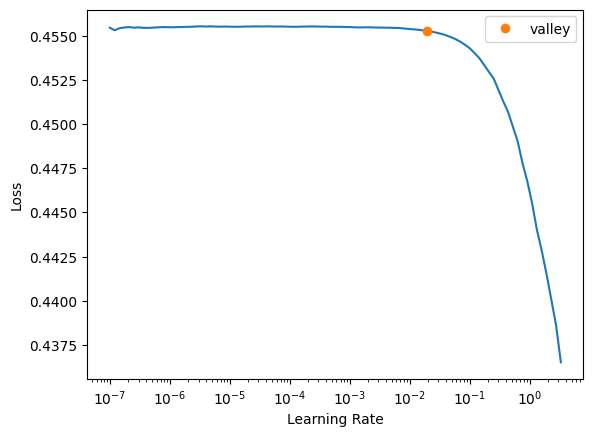

In [ ]:
model_fastai_learn= collab_learner(model_fastai, n_factors=50, y_range=(0, 1.1), metrics=custom_accuracy, loss_func=BCEWithLogitsLossFlat())
model_fastai_learn.lr_find()

In [ ]:
model_fastai_learn.fit_one_cycle(15, 1e-1, wd=0.1)

epoch,train_loss,valid_loss,custom_accuracy,time
0,0.340629,0.345212,0.525692,00:30
1,0.324094,0.332272,0.647484,00:30
2,0.332298,0.338870,0.586708,00:39
3,0.334141,0.341175,0.570672,00:38
4,0.332756,0.340009,0.583337,00:39
5,0.332461,0.339582,0.583434,00:37
6,0.330642,0.337402,0.600385,00:39
7,0.327907,0.335007,0.621478,00:38
8,0.323194,0.332614,0.644450,00:36
9,0.321341,0.328853,0.678594,00:38


In [ ]:
track_bias_embeddings = model_fastai_learn.model.i_bias.weight.squeeze()

# Identify the indexes of the least liked songs
not_liked_song_indexes = track_bias_embeddings.argsort()[:20]
print(not_liked_song_indexes)
# Retrieve the track entries (item names) for the least liked songs
least_liked_songs = [model_fastai_learn.dls.classes['item'][i] for i in not_liked_song_indexes]

# Assuming `model_fastai` is a DataFrame with all the records
# least_liked_songs_info = model_fastai['item'].isin(least_liked_songs)

# Displaying the least liked songs with their additional information
print(least_liked_songs)

tensor([ 1020,  7362,  5720,  4220,  2668,  5302,  1848, 10799,  2211,   868,
        12321, 14640,   472, 15637,  7759,  2065,  8774, 12269,  8543, 11098])
['At Giza, Om, 2006', 'Leaving Eden, Antimatter, 2007', 'Hooked On A Feeling, B.J. Thomas, 2011', 'Familiar Light, Asobi Seksu, 2009', 'Common Dreads, Enter Shikari, 2009', 'Hard Fucking, Tenacious D, 2001', 'Bottom of a Bottle, Smile Empty Soul, 2016', 'Sands of Time, Edguy, 2000', 'Captain Bligh, Filter, 1999', 'Anyway That You Want Me, Spiritualized, 2003', 'Swingers, Faithless, 2004', 'Walkey Walk Tall, 10 Ft. Ganja Plant, 2000', 'Agony, Fleshgod Apocalypse, 2015', 'Zumbul, Kultur Shock, 2008', 'Lotus, Minus the Bear, 2014', 'Burn This Disco Out, Michael Jackson, 1979', 'Nashville Skyline Rag, Bob Dylan, 1962', 'Swallowing Razorblades, Parkway Drive, 2013', 'Murder For The Money, Morphine, 1998', 'Shadows That Move, Mastodon, 2006']


In [ ]:
liked_song_indexes = track_bias_embeddings.argsort(descending=True)[:20]
print(liked_song_indexes)
liked_songs = [model_fastai_learn.classes['item'][i] for i in liked_song_indexes]
print(liked_songs)

tensor([10457,   524,  5245,  4766, 11075,  6373, 14263,  9677,  1956,  4457,
         5575,  5434, 14414, 12568,  1582, 14459, 13843,  8858,  9374,  5623])
['Revelry, Kings of Leon, 2008', 'Alejandro, Lady Gaga, 2010', 'Halo, Depeche Mode, 1990', 'Gears, Miss May I, 2010', 'Sexy Bitch, David Guetta, 2009', 'Imma Be, Black Eyed Peas, 2014', 'U Smile, Justin Bieber, 2010', 'Party In The U.S.A., The Barden Bellas, 2012', 'Bring Me To Life, Katherine Jenkins, 2012', 'Float On, Modest Mouse, 2004', "Hey There Delilah, Plain White T's, 2006", 'Heartbreak Warfare, John Mayer, 2010', 'Uprising, Sabaton, 2010', 'That Should Be Me, Justin Bieber, 2010', 'Bitter Sweet Symphony, The Verve, 1999', 'Vanilla Twilight, Owl City, 2014', 'Tim McGraw, Taylor Swift, 2014', 'Never Let You Go, Third Eye Blind, 2005', 'One Less Lonely Girl, Justin Bieber, 2010', "Hips Don't Lie, Shakira, 2001"]


In [ ]:
# Define recommender function
def get_song_recommendations(user_id, num_recommendations = 5):

    # Find the tracks user hasn't yet listened to
    all_songs = listening_history_filtered['item'].unique()
    listened_songs = listening_history_filtered[listening_history_filtered['user'] == user_id]['item'].unique()
    # not_listened_songs = list(set(all_songs) - set(listened_songs))
    not_listened_songs = all_songs
    # Get predictions from Learner
    input_dataframe = pd.DataFrame({'user': [user_id] * len(not_listened_songs), 'item': not_listened_songs})
    test_dl = model_fastai_learn.dls.test_dl(input_dataframe)
    predictions = model_fastai_learn.get_preds(dl=test_dl)

    # Associate song with prediction and sort by recommendation
    songs_with_predicted_rating = list(zip(not_listened_songs, predictions[0].numpy()))
    songs_with_predicted_rating.sort(key=lambda x: x[1], reverse=True)

    # Return top n
    recommendations = songs_with_predicted_rating[:num_recommendations]
    return recommendations

In [ ]:
def evaluate_recommendations(user_id, recommendations):
    # Get user's actual interactions
    actual_interactions = listening_history_filtered[listening_history_filtered['user'] == user_id]['item'].unique()
    print(actual_interactions)
    # Calculate true positives, false positives, and false negatives
    true_positives = len(set(recommendations) & set(actual_interactions))
    false_positives = len(recommendations) - true_positives
    false_negatives = len(actual_interactions) - true_positives

    # Calculate precision, recall, and F1-score
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1


In [ ]:
listening_history_filtered['user'].unique()[:20]

array(['b80344d063b5ccb3212f76538f3d9e43d87dca9e',
       '85c1f87fea955d09b4bec2e36aee110927aedf9a',
       'bd4c6e843f00bd476847fb75c47b4fb430a06856',
       '969cc6fb74e076a68e36a04409cb9d3765757508',
       '4bd88bfb25263a75bbdd467e74018f4ae570e5df',
       'e006b1a48f466bf59feefed32bec6494495a4436',
       '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec',
       '9bb911319fbc04f01755814cb5edb21df3d1a336',
       'b64cdd1a0bd907e5e00b39e345194768e330d652',
       '17aa9f6dbdf753831da8f38c71b66b64373de613',
       'd6589314c0a9bcbca4fee0c93b14bc402363afea',
       '5a905f000fc1ff3df7ca807d57edb608863db05d',
       'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1',
       '45544491ccfcdc0b0803c34f201a6287ed4e30f8',
       'ed7d4c476013b1c3dd91982b61494bf7436083ba',
       'baf47ed8da24d607e50d8684cde78b923538640f',
       '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf',
       'bd8475385f0aa78830fa6dfce9e7242164b035c8',
       '0afaa5d9d04bf85af720fe8cc566a41ca3e41c97',
       '403b3b867fc71dfdcc12652

In [ ]:
# Group by user and count interactions
user_interaction_counts = listening_history_filtered.groupby('user').size()

# Sort users by the number of interactions in descending order
sorted_users = [user_interaction_counts.sort_values(ascending=False)]

# Print the first 20 users with the highest number of interactions
print(sorted_users[:20])

[user
4e11f45d732f4861772b2906f81a7d384552ad12    384
13ce57b3a25ef63fa614335fd838e8024c42ec17    277
be21ec120193effd2a5e545c4bafa2e1f92e9816    207
3e6ef2a572d1f6f06df71bf28190eae9e1934a61    201
5b498bef2e926769cbd71f9aa3009149deabe2f2    187
                                           ... 
4ca7949de9e8aa2132db2f42799c9b7852b0fc51      1
4cbf7443bb2f82249046647d96cba05d259cefc2      1
4cccbe0d5ccab0e1f9273d31e37edb5ca487a55e      1
df0906b5faaa1de53f429c9a9d144e07181c0302      1
4725bdc1d869433da25862c6a3ceeb3c0eb7064d      1
Length: 10000, dtype: int64]


In [ ]:
listening_history_filtered[listening_history_filtered['user'] == '4e11f45d732f4861772b2906f81a7d384552ad12']

,track_id,user,rating,name,artist,genre,year,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,item,playcount_normalized
9094,TRCVOLK128F423EA9C,4e11f45d732f4861772b2906f81a7d384552ad12,1,Trompe le Monde,Pixies,Rock,1991,107573,0.212,0.801,-10.557,0.0444,0.000461,0.004360,0.3060,0.464,141.150,"Trompe le Monde, Pixies, 1991",1
9095,TRZHQIH12903CC5658,4e11f45d732f4861772b2906f81a7d384552ad12,2,Talk Show Host,Radiohead,Rock,1996,281000,0.535,0.479,-14.112,0.0311,0.277000,0.028500,0.1390,0.504,88.841,"Talk Show Host, Radiohead, 1996",1
9096,TRCPXID128F92D5D3C,4e11f45d732f4861772b2906f81a7d384552ad12,1,Halo,Depeche Mode,NaN,1990,270160,0.672,0.508,-12.620,0.0310,0.052800,0.067100,0.0801,0.741,112.184,"Halo, Depeche Mode, 1990",1
9097,TRHEYJZ128F931DBD0,4e11f45d732f4861772b2906f81a7d384552ad12,3,Luno,Bloc Party,Rock,2005,236133,0.404,0.968,-3.398,0.1620,0.000035,0.000022,0.1330,0.558,186.001,"Luno, Bloc Party, 2005",1
9098,TRUWDZO128F9339024,4e11f45d732f4861772b2906f81a7d384552ad12,4,Run Me Down,The Black Keys,NaN,2002,147346,0.716,0.621,-3.972,0.0899,0.539000,0.009630,0.1130,0.713,121.247,"Run Me Down, The Black Keys, 2002",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9473,TRDGIKP128F92E472D,4e11f45d732f4861772b2906f81a7d384552ad12,2,Zither,R.E.M.,Rock,2014,153920,0.613,0.444,-9.142,0.0454,0.902000,0.867000,0.1030,0.454,115.290,"Zither, R.E.M., 2014",1
9474,TRROPQP128F42631A2,4e11f45d732f4861772b2906f81a7d384552ad12,1,You're So Damn Hot,OK Go,Rock,2006,158533,0.538,0.853,-3.741,0.0568,0.002610,0.000000,0.0276,0.745,133.751,"You're So Damn Hot, OK Go, 2006",1
9475,TRIQNAM128F4259B52,4e11f45d732f4861772b2906f81a7d384552ad12,1,English Civil War,The Clash,Punk,2008,159800,0.270,0.949,-4.072,0.1050,0.051000,0.000000,0.5460,0.256,163.239,"English Civil War, The Clash, 2008",1
9476,TRVWQGQ128F933904F,4e11f45d732f4861772b2906f81a7d384552ad12,1,Them Eyes,The Black Keys,Rock,2002,143053,0.485,0.674,-6.925,0.1430,0.006780,0.000705,0.0779,0.779,131.809,"Them Eyes, The Black Keys, 2002",1


In [ ]:
recommendations = get_song_recommendations('4e11f45d732f4861772b2906f81a7d384552ad12', 30)
print(recommendations)

[('Heartbreak Warfare, John Mayer, 2010', 0.7502601), ('Revelry, Kings of Leon, 2008', 0.7502601), ('Gears, Miss May I, 2010', 0.7502601), ('Float On, Modest Mouse, 2004', 0.7502601), ('Alejandro, Lady Gaga, 2010', 0.7502601), ('Party In The U.S.A., The Barden Bellas, 2012', 0.7502601), ('Halo, Depeche Mode, 1990', 0.7502601), ('Imma Be, Black Eyed Peas, 2014', 0.7502601), ('U Smile, Justin Bieber, 2010', 0.7502601), ('Sexy Bitch, David Guetta, 2009', 0.7502601), ('Bring Me To Life, Katherine Jenkins, 2012', 0.7502601), ('Uprising, Sabaton, 2010', 0.75026006), ("Hey There Delilah, Plain White T's, 2006", 0.75026006), ('Vanilla Twilight, Owl City, 2014', 0.75026006), ('Bitter Sweet Symphony, The Verve, 1999', 0.75026006), ("Hips Don't Lie, Shakira, 2001", 0.75026006), ('Tim McGraw, Taylor Swift, 2014', 0.75026), ('That Should Be Me, Justin Bieber, 2010', 0.75026), ('My Name Is, Eminem, 1999', 0.75026), ('One Less Lonely Girl, Justin Bieber, 2010', 0.75026), ('Up Up & Away, Kid Cudi, 200

In [ ]:
precision, recall, f1 = evaluate_recommendations('4e11f45d732f4861772b2906f81a7d384552ad12', recommendations)
print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

['Trompe le Monde, Pixies, 1991' 'Talk Show Host, Radiohead, 1996'
 'Halo, Depeche Mode, 1990' 'Luno, Bloc Party, 2005'
 'Run Me Down, The Black Keys, 2002' 'Positive Tension, Bloc Party, 2005'
 'Courtesy Laughs, Phoenix, 2006' 'Fader, The Temper Trap, 2009'
 'Erase It Again, Sparta, 2006' 'Bad Sneakers, Steely Dan, 1975'
 'Soldier On, The Temper Trap, 2009' 'We Danced Together, The Rakes, 2007'
 'Uprising, Sabaton, 2010'
 'Your Visits Are Getting Shorter, Bloc Party, 2008'
 'Normal Like You, Everclear, 1997' 'Here It Goes Again, OK Go, 2010'
 'Where Is My Mind?, Pixies, 2005' 'The Worm, Audioslave, 2005'
 'The Scale, Interpol, 2007' 'Signal Fire, Snow Patrol, 2007'
 'M62 Song, Doves, 2010' "Lady Dada's Nightmare, MGMT, 2010"
 'Send Him Away, Franz Ferdinand, 2009' 'Time Awaits, The Kooks, 2006'
 'Rock & Roll Queen, The Subways, 2005'
 'Lisztomania (Classixx Version), Phoenix, 2009'
 'Us v Them, LCD Soundsystem, 2007' 'Giddy Up!, The Hives, 2007'
 "If There's a Rocket Tie Me To It, Sno

In [ ]:
def custom_accuracy_new(prediction, target, threshold=0.5):
    # Set predictions above threshold to 1, and below to 0
    prediction = torch.where(prediction > threshold, torch.tensor(1.0), torch.tensor(0.0))
    # Calculate accuracy
    correct = (prediction == target).float()
    accuracy = correct.sum() / len(target)
    return accuracy

In [ ]:
ground_truth_labels = listening_history_filtered[listening_history_filtered['user'] == '4e11f45d732f4861772b2906f81a7d384552ad12']['item'].unique() # Replace with actual ground truth labels
print(ground_truth_labels)
# Step 2: Get recommendations
recommendations = get_song_recommendations('4e11f45d732f4861772b2906f81a7d384552ad12', 30)

# Step 3: Calculate test accuracy using custom_accuracy
# Extract recommended song IDs from recommendations
recommended_songs = [song for song, _ in recommendations]

# Convert ground truth labels to tensor format (assuming you're using PyTorch)
ground_truth_tensor = torch.tensor([1.0 if song in ground_truth_labels else 0.0 for song in recommended_songs])

# Convert predicted ratings to tensor format (assuming you're using PyTorch)
predicted_ratings_tensor = torch.tensor([rating for _, rating in recommendations])

# Calculate test accuracy
test_accuracy = custom_accuracy_new(predicted_ratings_tensor, ground_truth_tensor)

# Print test accuracy
print("Test Accuracy:", test_accuracy.item())

['Trompe le Monde, Pixies, 1991' 'Talk Show Host, Radiohead, 1996'
 'Halo, Depeche Mode, 1990' 'Luno, Bloc Party, 2005'
 'Run Me Down, The Black Keys, 2002' 'Positive Tension, Bloc Party, 2005'
 'Courtesy Laughs, Phoenix, 2006' 'Fader, The Temper Trap, 2009'
 'Erase It Again, Sparta, 2006' 'Bad Sneakers, Steely Dan, 1975'
 'Soldier On, The Temper Trap, 2009' 'We Danced Together, The Rakes, 2007'
 'Uprising, Sabaton, 2010'
 'Your Visits Are Getting Shorter, Bloc Party, 2008'
 'Normal Like You, Everclear, 1997' 'Here It Goes Again, OK Go, 2010'
 'Where Is My Mind?, Pixies, 2005' 'The Worm, Audioslave, 2005'
 'The Scale, Interpol, 2007' 'Signal Fire, Snow Patrol, 2007'
 'M62 Song, Doves, 2010' "Lady Dada's Nightmare, MGMT, 2010"
 'Send Him Away, Franz Ferdinand, 2009' 'Time Awaits, The Kooks, 2006'
 'Rock & Roll Queen, The Subways, 2005'
 'Lisztomania (Classixx Version), Phoenix, 2009'
 'Us v Them, LCD Soundsystem, 2007' 'Giddy Up!, The Hives, 2007'
 "If There's a Rocket Tie Me To It, Sno

Test Accuracy: 0.23333333432674408


Ground Truth Labels: ['Trompe le Monde, Pixies, 1991' 'Talk Show Host, Radiohead, 1996'
 'Halo, Depeche Mode, 1990' 'Luno, Bloc Party, 2005'
 'Run Me Down, The Black Keys, 2002' 'Positive Tension, Bloc Party, 2005'
 'Courtesy Laughs, Phoenix, 2006' 'Fader, The Temper Trap, 2009'
 'Erase It Again, Sparta, 2006' 'Bad Sneakers, Steely Dan, 1975'
 'Soldier On, The Temper Trap, 2009' 'We Danced Together, The Rakes, 2007'
 'Uprising, Sabaton, 2010'
 'Your Visits Are Getting Shorter, Bloc Party, 2008'
 'Normal Like You, Everclear, 1997' 'Here It Goes Again, OK Go, 2010'
 'Where Is My Mind?, Pixies, 2005' 'The Worm, Audioslave, 2005'
 'The Scale, Interpol, 2007' 'Signal Fire, Snow Patrol, 2007'
 'M62 Song, Doves, 2010' "Lady Dada's Nightmare, MGMT, 2010"
 'Send Him Away, Franz Ferdinand, 2009' 'Time Awaits, The Kooks, 2006'
 'Rock & Roll Queen, The Subways, 2005'
 'Lisztomania (Classixx Version), Phoenix, 2009'
 'Us v Them, LCD Soundsystem, 2007' 'Giddy Up!, The Hives, 2007'
 "If There's a Roc

Recommendations: [('Heartbreak Warfare, John Mayer, 2010', 0.7502601), ('Revelry, Kings of Leon, 2008', 0.7502601), ('Gears, Miss May I, 2010', 0.7502601), ('Float On, Modest Mouse, 2004', 0.7502601), ('Alejandro, Lady Gaga, 2010', 0.7502601), ('Party In The U.S.A., The Barden Bellas, 2012', 0.7502601), ('Halo, Depeche Mode, 1990', 0.7502601), ('Imma Be, Black Eyed Peas, 2014', 0.7502601), ('U Smile, Justin Bieber, 2010', 0.7502601), ('Sexy Bitch, David Guetta, 2009', 0.7502601), ('Bring Me To Life, Katherine Jenkins, 2012', 0.7502601), ('Uprising, Sabaton, 2010', 0.75026006), ("Hey There Delilah, Plain White T's, 2006", 0.75026006), ('Vanilla Twilight, Owl City, 2014', 0.75026006), ('Bitter Sweet Symphony, The Verve, 1999', 0.75026006), ("Hips Don't Lie, Shakira, 2001", 0.75026006), ('Tim McGraw, Taylor Swift, 2014', 0.75026), ('That Should Be Me, Justin Bieber, 2010', 0.75026), ('My Name Is, Eminem, 1999', 0.75026), ('One Less Lonely Girl, Justin Bieber, 2010', 0.75026), ('Up Up & Aw